Dataset - https://www.kaggle.com/datasets/apollo2506/facial-recognition-dataset

In [ ]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/apollo2506/facial-recognition-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhushantaksande
Your Kaggle Key: ··········


100%|██████████| 59.7M/59.7M [00:00<00:00, 84.1MB/s]


In [ ]:
TRAIN_DIR = ('/content/facial-recognition-dataset/Training/Training/')
TEST_DIR = ('/content/facial-recognition-dataset/Testing/Testing/')

In [ ]:
def load_data(dir_path, IMG_SIZE):

    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
IMG_SIZE= (48, 48)

In [ ]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|██████████| 6/6 [00:06<00:00,  1.14s/it]


28273 images loaded from /content/facial-recognition-dataset/Training/Training/ directory.


In [ ]:
train_labels

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [ ]:
X_test, y_test, test_labels = load_data(TEST_DIR,IMG_SIZE)

100%|██████████| 6/6 [00:01<00:00,  3.35it/s]


7067 images loaded from /content/facial-recognition-dataset/Testing/Testing/ directory.


In [ ]:
def plot_samples(X, y, labels_dict, n=50):

    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

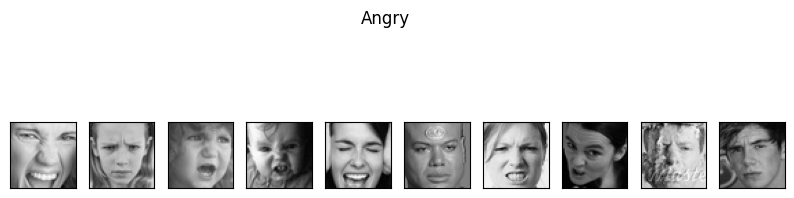

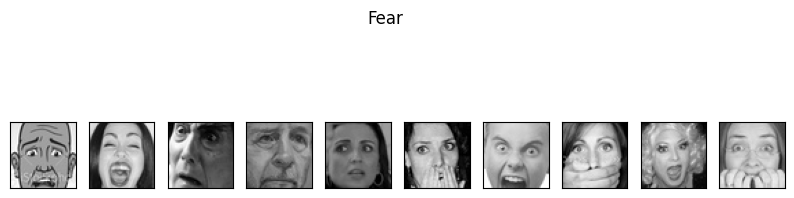

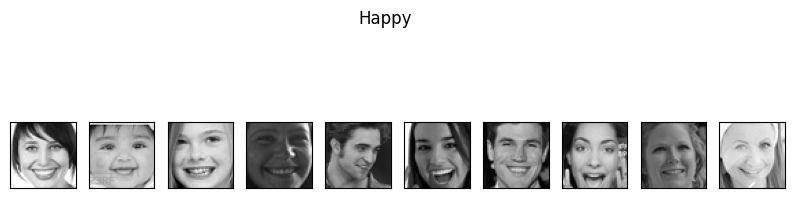

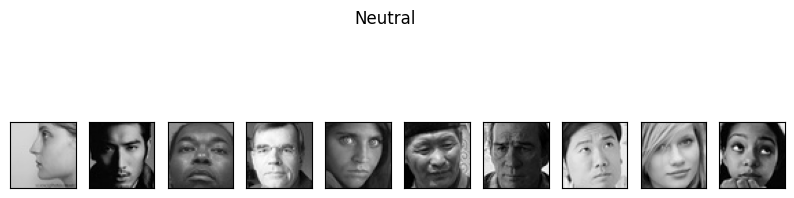

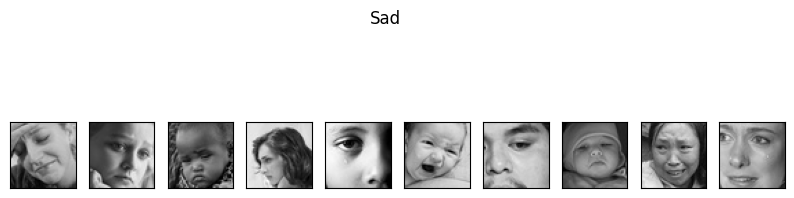

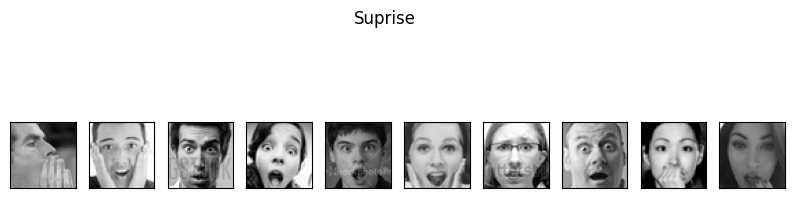

In [ ]:
plot_samples(X_train, y_train, train_labels, 10)

In [ ]:
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=6)
Y_train.shape

(28273, 6)

In [ ]:
Y_test = to_categorical(y_test, num_classes=6)
Y_test.shape

(7067, 6)

In [ ]:
from keras.utils import to_categorical

# One-hot encode the labels
Y_train = to_categorical(y_train, num_classes=6)
Y_test = to_categorical(y_test, num_classes=6)


CNN

Epoch 1/11
221/221 [==============================] - 10s 17ms/step - loss: 1.6826 - accuracy: 0.2990 - val_loss: 1.5059 - val_accuracy: 0.4007
Epoch 2/11
221/221 [==============================] - 3s 14ms/step - loss: 1.4602 - accuracy: 0.4216 - val_loss: 1.3348 - val_accuracy: 0.4818
Epoch 3/11
221/221 [==============================] - 5s 21ms/step - loss: 1.3347 - accuracy: 0.4756 - val_loss: 1.2527 - val_accuracy: 0.5163
Epoch 4/11
221/221 [==============================] - 4s 19ms/step - loss: 1.2637 - accuracy: 0.5118 - val_loss: 1.2123 - val_accuracy: 0.5343
Epoch 5/11
221/221 [==============================] - 4s 18ms/step - loss: 1.2046 - accuracy: 0.5374 - val_loss: 1.1887 - val_accuracy: 0.5420
Epoch 6/11
221/221 [==============================] - 4s 20ms/step - loss: 1.1635 - accuracy: 0.5528 - val_loss: 1.1715 - val_accuracy: 0.5503
Epoch 7/11
221/221 [==============================] - 3s 15ms/step - loss: 1.1280 - accuracy: 0.5694 - val_loss: 1.1631 - val_accuracy: 0.548

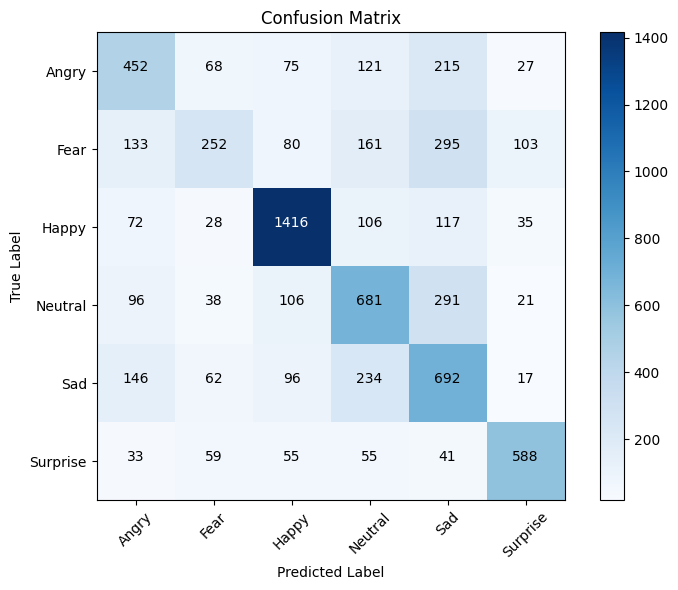

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=11, batch_size=128, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(patience=3)])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute classification report and confusion matrix
class_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
print(classification_report(y_true, y_pred_classes, target_names=class_names))
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.tight_layout()
plt.show()


KNN

KNN Accuracy: 0.3371
              precision    recall  f1-score   support

       Angry       0.27      0.28      0.28       958
        Fear       0.29      0.28      0.29      1024
       Happy       0.39      0.47      0.42      1774
     Neutral       0.27      0.37      0.32      1233
         Sad       0.30      0.17      0.22      1247
    Surprise       0.56      0.38      0.46       831

    accuracy                           0.34      7067
   macro avg       0.35      0.33      0.33      7067
weighted avg       0.34      0.34      0.33      7067



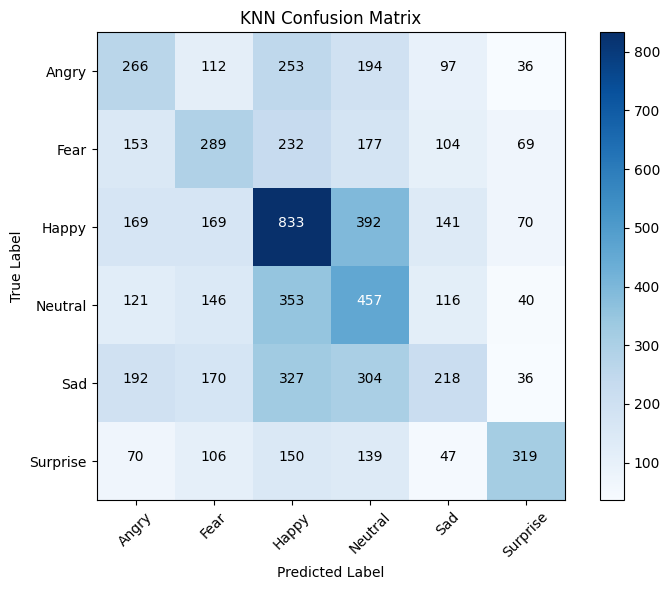

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Reshape the data if necessary (KNN requires flattened feature vectors)
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_flatten)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

# Generate classification report
print(classification_report(y_test, y_pred_knn, target_names=class_names))

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(conf_matrix_knn)):
    for j in range(len(conf_matrix_knn)):
        plt.text(j, i, format(conf_matrix_knn[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_knn[i, j] > conf_matrix_knn.max() / 2 else "black")
plt.tight_layout()
plt.show()


VGG-16

In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


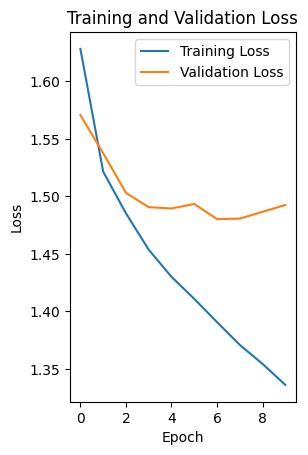

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(
        weights=None,
        include_top=False,
        input_shape=IMG_SIZE + (3,)
    )

base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
NUM_CLASSES = 6

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(NUM_CLASSES, activation="softmax"))


In [ ]:
def deep_model(model, X_train, Y_train, epochs, batch_size):

    model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

#     es = EarlyStopping(monitor='val_loss',
#                            restore_best_weights=True,
#                            mode='min'
#                           min_delta=1.5)
    history = model.fit(X_train
                       , Y_train
                       , epochs=epochs
                       , batch_size=batch_size
                       , verbose=1)
    return history

In [ ]:
epochs = 3
batch_size = 128

history = deep_model(model, X_train, Y_train, epochs, batch_size)

Epoch 1/3
221/221 [==============================] - 35s 126ms/step - loss: 0.4754 - accuracy: 0.2477
Epoch 2/3
221/221 [==============================] - 22s 101ms/step - loss: 0.4475 - accuracy: 0.2551
Epoch 3/3
221/221 [==============================] - 22s 99ms/step - loss: 0.4445 - accuracy: 0.2552


177/177 [==============================] - 4s 15ms/step - loss: 1.4735 - accuracy: 0.4200
Test Loss: 1.4735
Test Accuracy: 0.4200


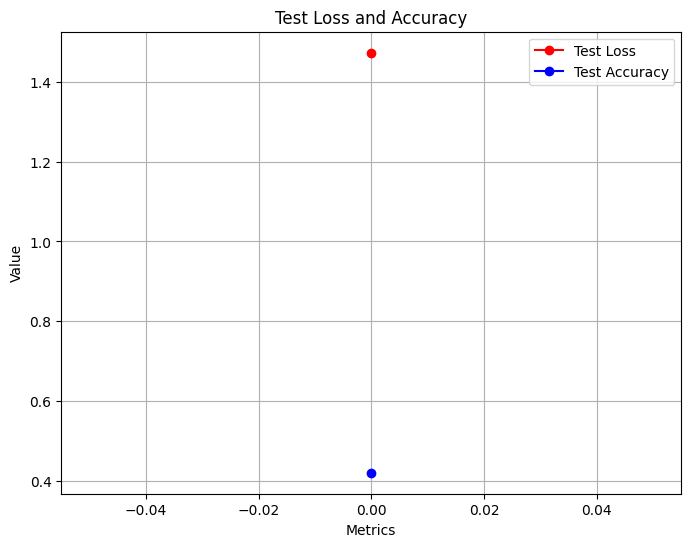

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plot the test loss and accuracy
plt.figure(figsize=(8, 6))

# Plot test loss
plt.plot(loss, label='Test Loss', marker='o', color='red')

# Plot test accuracy
plt.plot(accuracy, label='Test Accuracy', marker='o', color='blue')

plt.title('Test Loss and Accuracy')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions using the trained model
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(Y_true_classes, Y_pred_classes))

221/221 [==============================] - 4s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       958
           1       0.00      0.00      0.00      1024
           2       0.25      1.00      0.40      1774
           3       0.00      0.00      0.00      1233
           4       0.00      0.00      0.00      1247
           5       0.00      0.00      0.00       831

    accuracy                           0.25      7067
   macro avg       0.04      0.17      0.07      7067
weighted avg       0.06      0.25      0.10      7067



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix:
[[   0    0  958    0    0    0]
 [   0    0 1024    0    0    0]
 [   0    0 1774    0    0    0]
 [   0    0 1233    0    0    0]
 [   0    0 1247    0    0    0]
 [   0    0  831    0    0    0]]


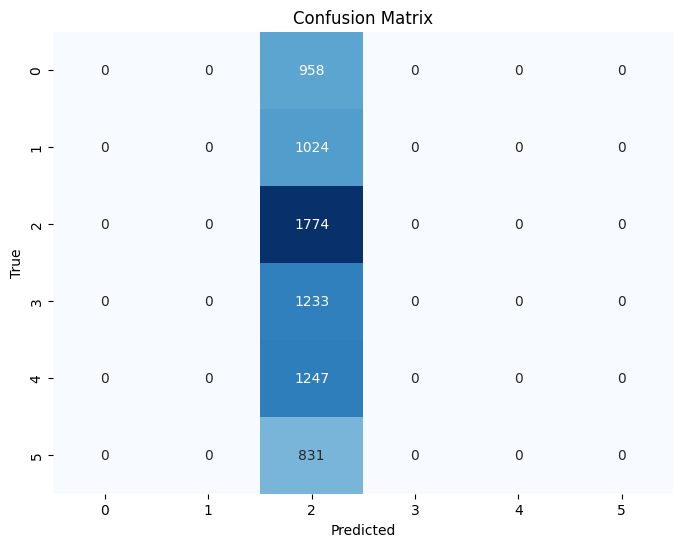

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ensemble Method by combining CNN KNN, and VGG-16 models

221/221 [==============================] - 3s 12ms/step
Ensemble Accuracy: 0.2510
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       958
        Fear       0.00      0.00      0.00      1024
       Happy       0.25      1.00      0.40      1774
     Neutral       0.00      0.00      0.00      1233
         Sad       0.00      0.00      0.00      1247
    Surprise       0.00      0.00      0.00       831

    accuracy                           0.25      7067
   macro avg       0.04      0.17      0.07      7067
weighted avg       0.06      0.25      0.10      7067



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



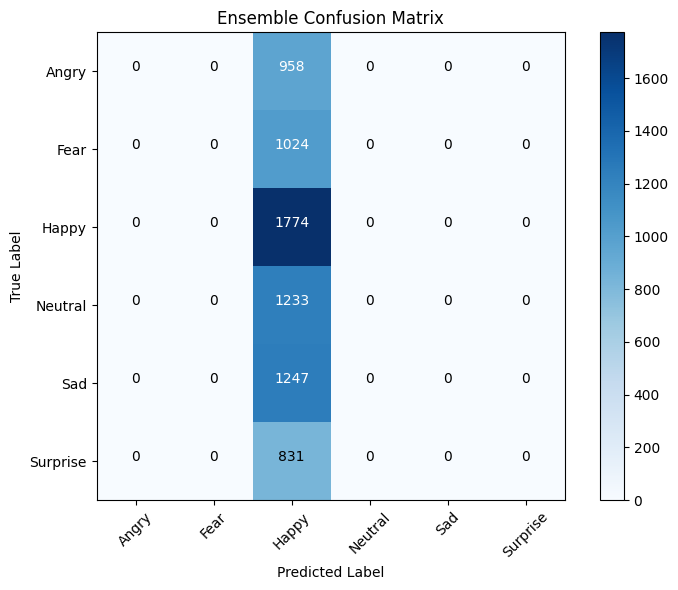

In [ ]:
# Make predictions using CNN model
y_pred_cnn = model.predict(X_test)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)

# Make predictions using KNN model
y_pred_knn = knn_model.predict(X_test_flatten)

# Make predictions using VGG16 model
y_pred_vgg = model.predict(X_test)
y_pred_classes_vgg = np.argmax(y_pred_vgg, axis=1)

# Combine predictions using majority voting
ensemble_predictions = np.array([y_pred_classes_cnn, y_pred_knn, y_pred_classes_vgg])
ensemble_predictions = np.transpose(ensemble_predictions)
y_pred_ensemble = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=ensemble_predictions)

# Evaluate ensemble
accuracy_ensemble = accuracy_score(y_true, y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy_ensemble:.4f}')

# Generate classification report for ensemble
print(classification_report(y_true, y_pred_ensemble, target_names=class_names))

# Generate confusion matrix for ensemble
conf_matrix_ensemble = confusion_matrix(y_true, y_pred_ensemble)

# Plot confusion matrix for ensemble
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_ensemble, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Ensemble Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(conf_matrix_ensemble)):
    for j in range(len(conf_matrix_ensemble)):
        plt.text(j, i, format(conf_matrix_ensemble[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_ensemble[i, j] > conf_matrix_ensemble.max() / 2 else "black")
plt.tight_layout()
plt.show()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen_test = ImageDataGenerator(rescale = 1./255)
pred_generator = datagen_test.flow_from_directory(TEST_DIR,
                                                 target_size = (48,48),
                                                 color_mode = "grayscale",
                                                 batch_size = batch_size,
                                                 class_mode = "categorical",
                                                 shuffle=False)

Found 7067 images belonging to 6 classes.


In [ ]:
new_predictions = model.predict(X_test)
y_pred = [np.argmax(probas) for probas in new_predictions]
y_pred = [test_labels[k] for k in y_pred]

221/221 [==============================] - 4s 14ms/step


In [ ]:
filenames = pred_generator.filenames
actual_class = [test_labels[h] for h in pred_generator.classes]

In [ ]:
for i in range(len(actual_class)):

    # replace hardik with shardul
    if actual_class[i] == 'Angry' or actual_class[i] == 'Suprise' or actual_class[i] == 'Fear'or actual_class[i] == 'Sad' :
        actual_class[i] = 'Stressed'

    # replace pant with ishan
    if actual_class[i] == 'Happy' or actual_class[i] == 'Neutral':
        actual_class[i] = 'not stressed'

In [ ]:
actual_class

['Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',

In [ ]:
for i in range(len(y_pred)):

    # replace hardik with shardul
    if y_pred[i] == 'Angry' or y_pred[i] == 'Suprise' or y_pred[i] == 'Fear'or y_pred[i] == 'Sad' :
        y_pred[i] = 'Stressed'

    # replace pant with ishan
    if y_pred[i] == 'Happy' or y_pred[i] == 'Neutral':
        y_pred[i] = 'not stressed'


In [ ]:
y_pred

['not stressed',
 'not stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'not stressed',
 'not stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'not stressed',
 'not stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'not stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'Stressed',
 'Stressed',
 'not stressed',
 'Stressed',
 'not stressed',
 'not stres

In [ ]:
import pandas as pd

pred_result = pd.DataFrame({"Filename":filenames,
                           "Predictions":y_pred,
                           "Actual Values":actual_class})

pred_result.head()

,Filename,Predictions,Actual Values
0,Angry/Angry-1.jpg,not stressed,Stressed
1,Angry/Angry-10.jpg,not stressed,Stressed
2,Angry/Angry-100.jpg,Stressed,Stressed
3,Angry/Angry-101.jpg,not stressed,Stressed
4,Angry/Angry-102.jpg,Stressed,Stressed


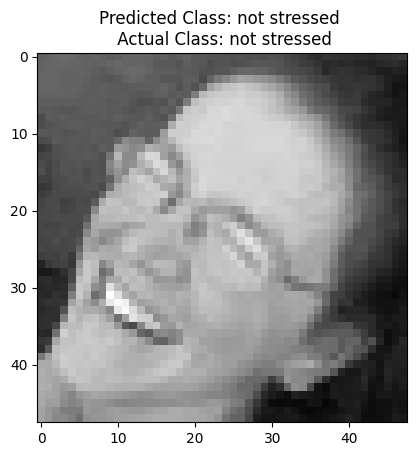

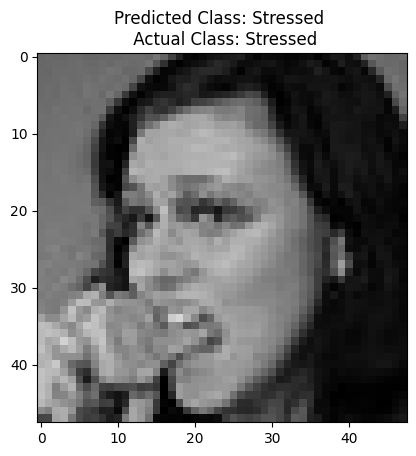

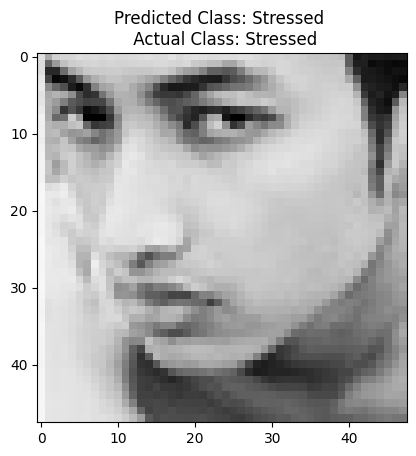

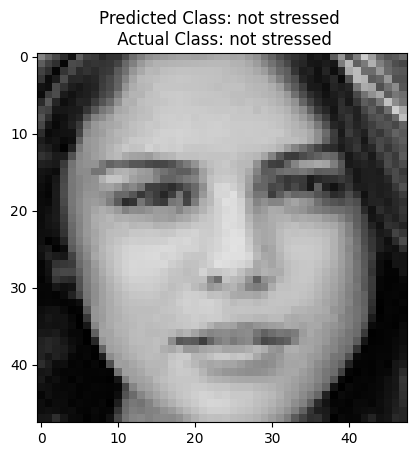

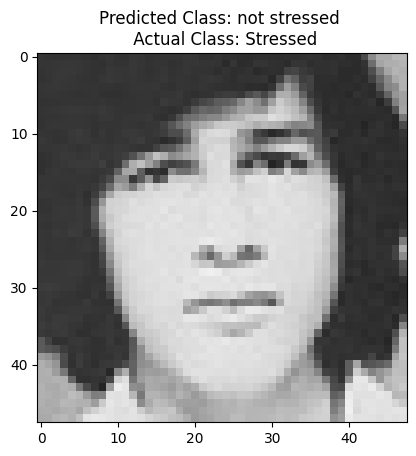

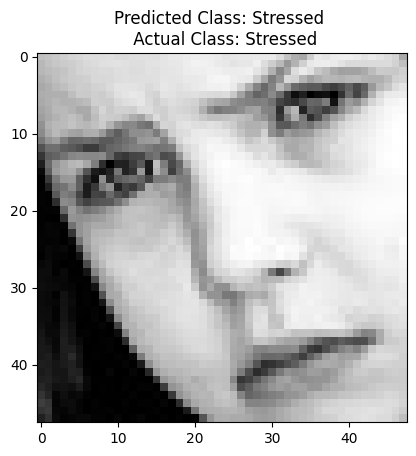

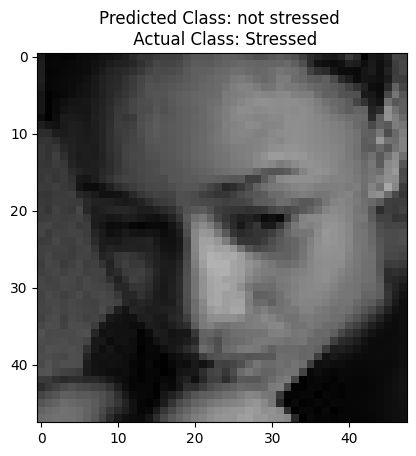

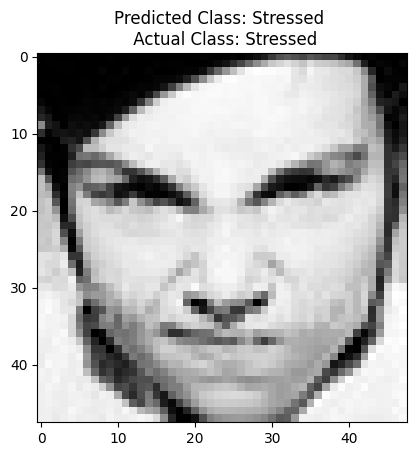

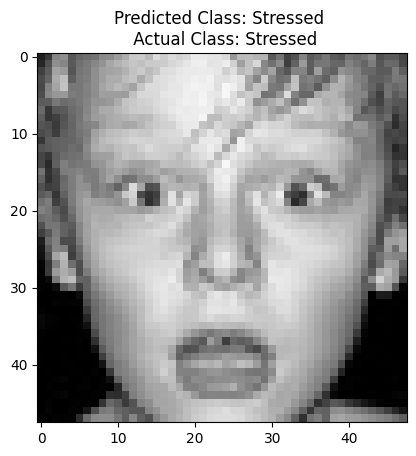

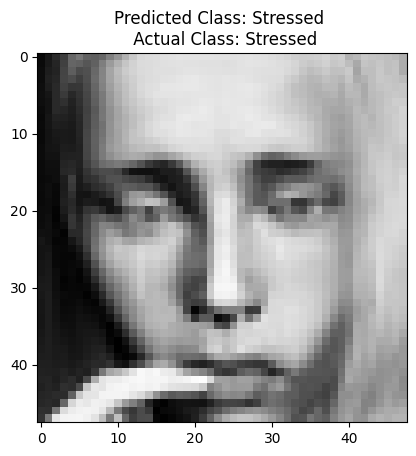

In [ ]:
from random import randint

l = len(filenames)
base_path = TEST_DIR
for i in range(10):  # 10 images

    rnd_number = randint(0,l-1)
    filename,pred_class,actual_class = pred_result.loc[rnd_number]

    img_path = os.path.join(base_path,filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Predicted Class: {} {} Actual Class: {}".format(pred_class,'\n',actual_class))
    plt.show()
    pass

In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
